# Coca Cola Stock Price

## Objectives


- Enhance Trading Performance with Strategic Close Price Forecasting
- Risk Detection for Low Price: Forecasting and Managing Market Volatility


In [1]:
#pip install pyodbc

# **Connecting to the DataBase**

In [2]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt


# Obtenez la liste des pilotes ODBC installés
drivers = [driver for driver in pyodbc.drivers()]

# Affichez la liste des pilotes
for driver in drivers:
    print(driver)

SQL Server
SQL Server Native Client 11.0
Microsoft Access Driver (*.mdb, *.accdb)
Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)
Microsoft Access Text Driver (*.txt, *.csv)


In [3]:
import pyodbc
import pandas as pd  # Importez pandas
# Paramètres de connexion
server = 'DESKTOP-ESB8B0G'
database = 'DW_COCACOLA'

# Chaîne de connexion avec authentification Windows
conn_str = (
    f'DRIVER=SQL Server Native Client 11.0;'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'Trusted_Connection=yes;'  # Utilisez l'authentification Windows
)

# Établir la connexion
conn = pyodbc.connect(conn_str)

# **Stock's Performance fact table**

In [4]:

# Exécuter la requête SQL
sql_query = 'SELECT * FROM Fact_Perfomances'
FactPerf = pd.read_sql(sql_query, conn)
FactPerf['Date'] = pd.to_datetime(FactPerf['Date_FK'], format='%Y%m%d', errors='coerce')

FactPerf.set_index('Date',inplace=True)

# Ensure that the index is a datetime type
FactPerf.index = pd.to_datetime(FactPerf.index)
# Afficher les premières lignes du DataFrame
FactPerf


C:\Users\MSI\AppData\Local\Temp\ipykernel_22648\3148141140.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  FactPerf = pd.read_sql(sql_query, conn)


,Revenue,Profit,High,Low,Open_Price,Close_Price,Adj_Close,Volume,VolumeRate,Date_FK,Company_FK,Location_FK,StockExchange_FK,investor_FK,Change
Date,,,,,,,,,,,,,,,
1997-02-14,46.854,7060.0,30.500000,30.125000,16.043193,30.312500,16.164536,5933000.0,822.447457,19970214,553,119,467153,603.0,0.0
1997-02-18,46.854,7060.0,30.750000,30.250000,30.312500,30.750000,16.397837,0.0,0.000000,19970218,553,119,467153,603.0,0.0
1997-02-19,46.854,7060.0,16.258175,30.625000,30.750000,31.000000,16.531151,5995200.0,830.879448,19970219,553,119,467153,603.0,0.0
1997-02-20,46.854,7060.0,30.937500,16.004907,30.937500,30.625000,16.331175,5168600.0,716.333043,19970220,553,119,467153,603.0,0.0
1997-02-21,46.854,7060.0,31.125000,30.562500,30.625000,31.000000,16.531151,8153200.0,1127.664211,19970221,553,119,467153,603.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997-02-07,46.854,7060.0,29.187500,28.500000,28.875000,29.125000,15.531282,0.0,0.000000,19970207,553,119,467153,603.0,0.0
1997-02-10,46.854,7060.0,29.812500,29.125000,16.043193,29.125000,15.531282,4787000.0,663.850611,19970210,553,119,467153,603.0,0.0
1997-02-11,46.854,7060.0,29.625000,29.125000,29.125000,16.099507,0.049045,4324600.0,599.736909,19970211,553,119,467153,603.0,0.0


# Data Preparation

### **Treating null and duplicate values**

In [5]:
FactPerf.isnull().sum()

Revenue               0
Profit                0
High                  0
Low                   0
Open_Price            0
Close_Price           0
Adj_Close             0
Volume                0
VolumeRate            0
Date_FK               0
Company_FK            0
Location_FK           0
StockExchange_FK      0
investor_FK         437
Change                0
dtype: int64

In [6]:
FactPerf.dropna(inplace=True)
FactPerf.isnull().sum()

Revenue             0
Profit              0
High                0
Low                 0
Open_Price          0
Close_Price         0
Adj_Close           0
Volume              0
VolumeRate          0
Date_FK             0
Company_FK          0
Location_FK         0
StockExchange_FK    0
investor_FK         0
Change              0
dtype: int64

In [7]:
FactPerf.duplicated().sum()

126

In [8]:
FactPerf.drop_duplicates(inplace=True)


In [9]:
FactPerf.duplicated().sum()

0

In [10]:
# Triez votre DataFrame par la colonne Date_FK
FactPerf = FactPerf.sort_values(by=['Date_FK'])

# Calculez la colonne "Change" en pourcentage
FactPerf['Change'] = ((FactPerf['Close_Price'] - FactPerf['Close_Price'].shift(1)) / FactPerf['Close_Price'].shift(1)) * 100
# Remplacez les valeurs NaN dans la première ligne par 0, car il n'y a pas de valeur précédente
FactPerf['Change'].dropna

# Affichez les premières lignes du DataFrame avec la colonne "Change" calculée
FactPerf

,Revenue,Profit,High,Low,Open_Price,Close_Price,Adj_Close,Volume,VolumeRate,Date_FK,Company_FK,Location_FK,StockExchange_FK,investor_FK,Change
Date,,,,,,,,,,,,,,,
1962-01-03,46.854,7060.0,0.259115,0.253255,0.259115,0.257161,0.049994,1574400.0,221.500562,19620103,553,119,467153,603.0,NaN
1962-01-04,46.854,7060.0,16.258175,0.257813,0.257813,0.259115,0.050374,844800.0,118.586947,19620104,553,119,467153,603.0,0.759843
1962-01-05,46.854,7060.0,0.262370,0.252604,0.259115,0.253255,0.049234,0.0,0.000000,19620105,553,119,467153,603.0,-2.261544
1962-01-08,46.854,7060.0,16.258175,0.245768,0.251302,16.099507,0.048728,2035200.0,285.053644,19620108,553,119,467153,603.0,6257.033887
1962-01-09,46.854,7060.0,0.256510,0.248698,0.250651,0.255208,0.049614,960000.0,135.061652,19620109,553,119,467153,603.0,-98.414809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-09,46.854,7060.0,55.130001,54.590000,54.750000,54.860001,54.860001,13846400.0,1889.988021,20211209,553,119,467153,603.0,-0.254544
2021-12-13,46.854,7060.0,57.930000,56.959999,16.043193,57.759998,57.759998,31362800.0,4298.896187,20211213,553,119,467153,603.0,5.286179
2021-12-14,46.854,7060.0,58.169998,57.400002,57.400002,57.799999,57.799999,0.0,0.000000,20211214,553,119,467153,603.0,0.069254


# *Feature engineering*

In [11]:
FactPerf['Range'] = (FactPerf['High'] - FactPerf['Low'])
FactPerf['Revenue'] =FactPerf['Revenue']*1000
FactPerf['Profit_Margin'] =(FactPerf['Profit'] -FactPerf['Revenue'])*100
FactPerf['Return']=100*(FactPerf['Close_Price']-FactPerf['Open_Price'])/FactPerf['Open_Price']
FactPerf['Price_Difference'] = FactPerf['Close_Price'] - FactPerf['Open_Price']
# Calculate daily gains and losses
FactPerf['Gain'] = FactPerf['Close_Price'].diff()
FactPerf['Loss'] = -FactPerf['Gain'].apply(lambda x: min(0, x))
FactPerf=FactPerf.drop('Date_FK',axis=1)
# Calculate average gains and losses over the specified period
n=7
FactPerf['Avg Gain'] = FactPerf['Gain'].rolling(window=n).mean()
FactPerf['Avg Loss'] = FactPerf['Loss'].rolling(window=n).mean()
# Calculate RS and RSIF
FactPerf['RS'] = FactPerf['Avg Gain'] / FactPerf['Avg Loss']
FactPerf['RSI'] = 100 - (100 / (1 + FactPerf['RS']))
columns_to_delete = ["Company_FK", "Location_FK", "StockExchange_FK", "investor_FK"]
FactPerf = FactPerf.drop(columns=columns_to_delete)
FactPerf

,Revenue,Profit,High,Low,Open_Price,Close_Price,Adj_Close,Volume,VolumeRate,Change,Range,Profit_Margin,Return,Price_Difference,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
Date,,,,,,,,,,,,,,,,,,,,
1962-01-03,46854.000092,7060.0,0.259115,0.253255,0.259115,0.257161,0.049994,1574400.0,221.500562,NaN,0.005860,-3.979400e+06,-0.754113,-0.001954,NaN,-0.000000,NaN,NaN,NaN,NaN
1962-01-04,46854.000092,7060.0,16.258175,0.257813,0.257813,0.259115,0.050374,844800.0,118.586947,0.759843,16.000362,-3.979400e+06,0.505019,0.001302,0.001954,-0.000000,NaN,NaN,NaN,NaN
1962-01-05,46854.000092,7060.0,0.262370,0.252604,0.259115,0.253255,0.049234,0.0,0.000000,-2.261544,0.009766,-3.979400e+06,-2.261544,-0.005860,-0.005860,0.005860,NaN,NaN,NaN,NaN
1962-01-08,46854.000092,7060.0,16.258175,0.245768,0.251302,16.099507,0.048728,2035200.0,285.053644,6257.033887,16.012407,-3.979400e+06,6306.437886,15.848205,15.846252,-0.000000,NaN,NaN,NaN,NaN
1962-01-09,46854.000092,7060.0,0.256510,0.248698,0.250651,0.255208,0.049614,960000.0,135.061652,-98.414809,0.007812,-3.979400e+06,1.818059,0.004557,-15.844299,15.844299,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-09,46854.000092,7060.0,55.130001,54.590000,54.750000,54.860001,54.860001,13846400.0,1889.988021,-0.254544,0.540001,-3.979400e+06,0.200914,0.110001,-0.139999,0.139999,0.344286,5.585785,0.061636,5.805760
2021-12-13,46854.000092,7060.0,57.930000,56.959999,16.043193,57.759998,57.759998,31362800.0,4298.896187,5.286179,0.970001,-3.979400e+06,260.028081,41.716806,2.899998,-0.000000,0.780000,5.564356,0.140178,12.294390
2021-12-14,46854.000092,7060.0,58.169998,57.400002,57.400002,57.799999,57.799999,0.0,0.000000,0.069254,0.769997,-3.979400e+06,0.696860,0.399998,0.040001,-0.000000,0.675714,5.564356,0.121436,10.828632


In [12]:
FactPerf.dropna(inplace=True)


## Treating Outliers

In [13]:
# Liste des colonnes numériques que vous souhaitez vérifier
colonnes_numeriques =['Open_Price', 'High', 'Low', 'Close_Price', 'Adj_Close', 'Volume', 'VolumeRate','Change','Revenue','Profit','Avg Gain','Avg Loss','RS','RSI']

# Parcourir chaque colonne
for colonne in colonnes_numeriques:
    # Calculez les quartiles Q1 (25e percentile) et Q3 (75e percentile)
    Q1 = FactPerf[colonne].quantile(0.25)
    Q3 = FactPerf[colonne].quantile(0.75)

    # Calculez l'IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Calculez les limites pour les valeurs aberrantes
    borne_inferieure = Q1 - 1.5 * IQR
    borne_superieure = Q3 + 1.5 * IQR

    # Vérifiez quelles lignes contiennent des valeurs aberrantes dans la colonne sélectionnée
    valeurs_aberrantes = FactPerf[(FactPerf[colonne] < borne_inferieure) | (FactPerf[colonne] > borne_superieure)]

    # Affichez les lignes contenant des valeurs aberrantes pour cette colonne, si elles existent
    if not valeurs_aberrantes.empty:
        print(f"\nLignes avec des valeurs aberrantes dans la colonne '{colonne}':")
        print(valeurs_aberrantes)
    else :
         print(f"\nPas des valeurs aberrantes pour: '{colonne}':")


Pas des valeurs aberrantes pour: 'Open_Price':

Pas des valeurs aberrantes pour: 'High':

Pas des valeurs aberrantes pour: 'Low':

Pas des valeurs aberrantes pour: 'Close_Price':

Lignes avec des valeurs aberrantes dans la colonne 'Adj_Close':
                 Revenue  Profit       High        Low  Open_Price  \
Date                                                                 
2017-11-14  46854.000092  7060.0  47.480000  46.619999   16.043193   
2018-01-17  46854.000092  7060.0  47.000000  46.549999   46.580002   
2018-01-18  46854.000092  7060.0  47.070000  46.610001   46.750000   
2018-01-19  46854.000092  7060.0  16.258175  46.869999   46.990002   
2018-01-22  46854.000092  7060.0  47.500000  47.090000   47.139999   
...                  ...     ...        ...        ...         ...   
2021-12-09  46854.000092  7060.0  55.130001  54.590000   54.750000   
2021-12-13  46854.000092  7060.0  57.930000  56.959999   16.043193   
2021-12-14  46854.000092  7060.0  58.169998  57.400002 

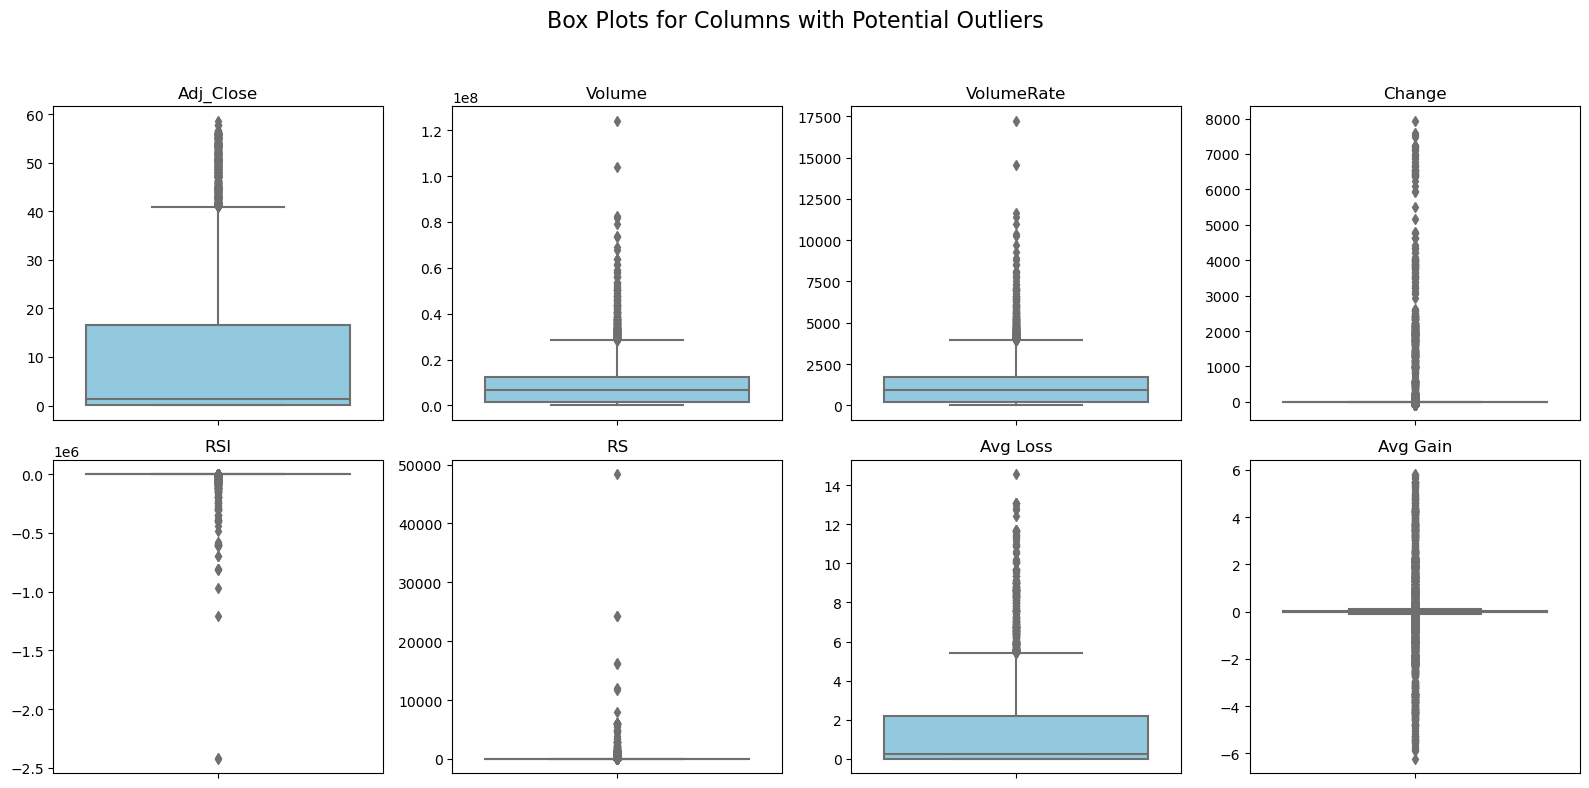

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns with potential outliers
columns_with_outliers = ['Adj_Close', 'Volume', 'VolumeRate', 'Change', 'RSI', 'RS', 'Avg Loss', 'Avg Gain']

# Create subplots for each column in a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Box Plots for Columns with Potential Outliers', fontsize=16)

# Create box plots for each column
for i, column in enumerate(columns_with_outliers):
    sns.boxplot(data=FactPerf, y=column, ax=axes[i // 4, i % 4], color='skyblue')
    axes[i // 4, i % 4].set_title(column)
    axes[i // 4, i % 4].set_ylabel('')
    axes[i // 4, i % 4].set_xlabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


**Handling Outliers in Specific Columns and Replacing with Max and Min Non-Outlier Values**

In [15]:
import pandas as pd


# Define the columns with outliers
columns_with_outliers = ['Adj_Close', 'Volume', 'VolumeRate', 'Change', 'RSI', 'RS', 'Avg Loss', 'Avg Gain']

# Loop through each column with outliers
for column in columns_with_outliers:
    # Calculate the IQR (Interquartile Range)
    Q1 = FactPerf[column].quantile(0.25)
    Q3 = FactPerf[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for identifying outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify high and low outliers
    high_outliers = FactPerf[FactPerf[column] > upper_bound]
    low_outliers = FactPerf[FactPerf[column] < lower_bound]

    # Replace high outliers with the maximum non-outlier value in the column
    max_non_outlier = FactPerf[(FactPerf[column] >= lower_bound) & (FactPerf[column] <= upper_bound)][column].max()
    FactPerf.loc[high_outliers.index, column] = max_non_outlier

    # Replace low outliers with the minimum non-outlier value in the column
    min_non_outlier = FactPerf[(FactPerf[column] >= lower_bound) & (FactPerf[column] <= upper_bound)][column].min()
    FactPerf.loc[low_outliers.index, column] = min_non_outlier

# Now, df contains the outliers in the specified columns replaced with max and min non-outlier values


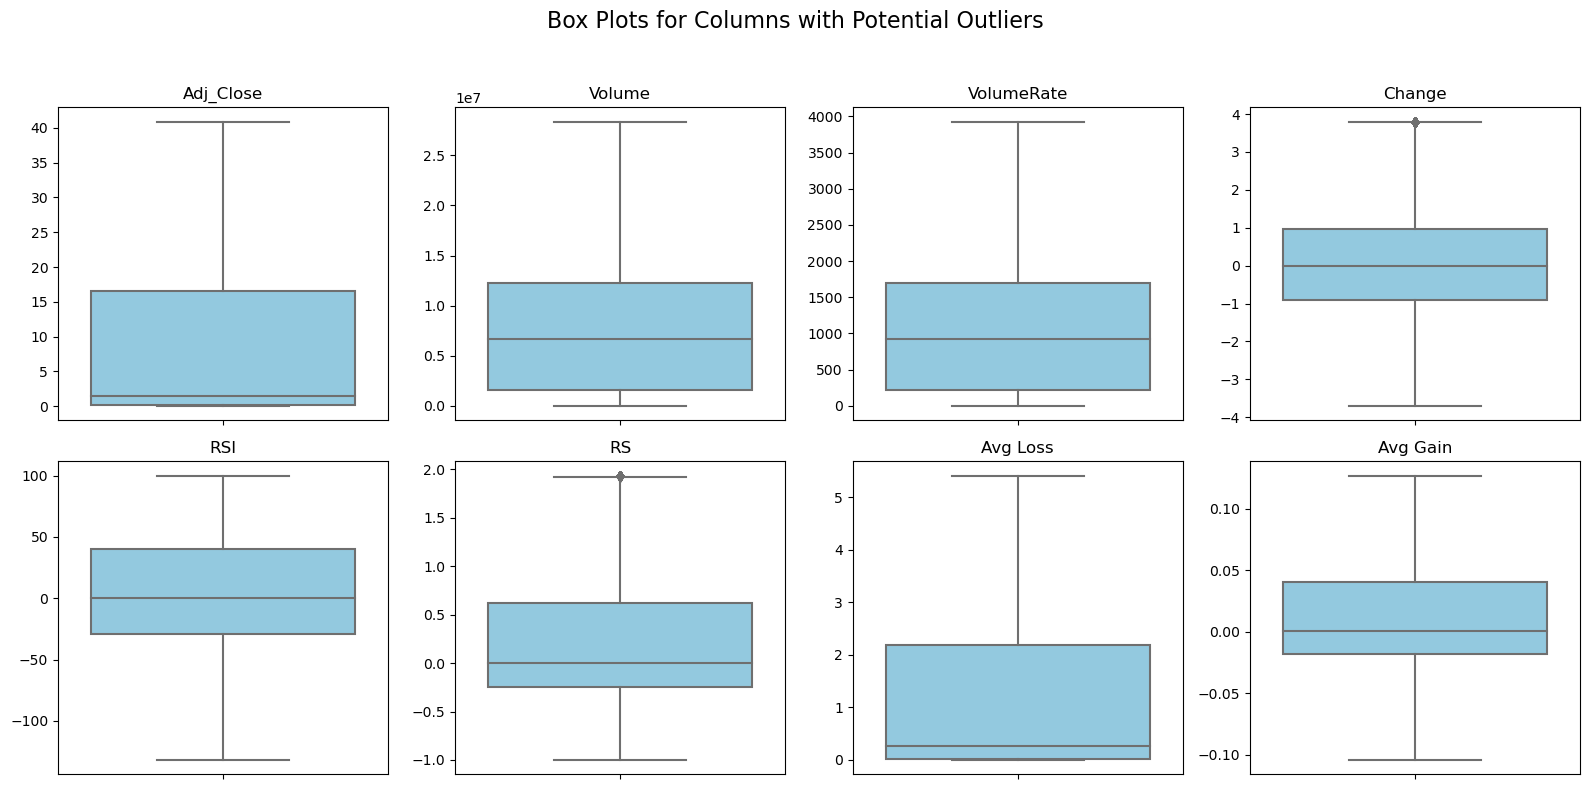

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns with potential outliers
columns_with_outliers = ['Adj_Close', 'Volume', 'VolumeRate', 'Change', 'RSI', 'RS', 'Avg Loss', 'Avg Gain']

# Create subplots for each column in a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Box Plots for Columns with Potential Outliers', fontsize=16)

# Create box plots for each column
for i, column in enumerate(columns_with_outliers):
    sns.boxplot(data=FactPerf, y=column, ax=axes[i // 4, i % 4], color='skyblue')
    axes[i // 4, i % 4].set_title(column)
    axes[i // 4, i % 4].set_ylabel('')
    axes[i // 4, i % 4].set_xlabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


# *Feature scaling*

In [ ]:
FactPerf

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotDistribution(FactPerf, nRows, nGraphPerRow):
    columnNames = FactPerf.columns
    totalColumns = len(columnNames)
    totalPlots = nRows * nGraphPerRow

    fig, ax = plt.subplots(nrows=nRows, ncols=nGraphPerRow, figsize=(20, 10))

    for i in range(totalPlots):
        if i < totalColumns:
            row = i // nGraphPerRow
            col = i % nGraphPerRow
            sns.histplot(FactPerf[columnNames[i]], ax=ax[row, col], kde=True)
        else:
            # Remove any extra empty subplots
            ax.flat[i].set_visible(False)

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

# Usage example:
# Replace 'your_df' with your DataFrame and specify the number of rows and graphs per row.
# plotDistribution(your_df, nRows, nGraphPerRow)


In [ ]:
#df1 = FactPerf[['Open_Price', 'High', 'Low', 'Close_Price', 'Adj_Close', 'Volume', 'VolumeRate','Change','Revenue','Profit']]
df1 = FactPerf[['Open_Price', 'High', 'Low', 'Close_Price', 'Adj_Close', 'Volume', 'VolumeRate','Change','Revenue','Profit','Avg Gain','Avg Loss','RS','RSI']]
plotDistribution(df1, 3, 4)  # You may want to adjust the layout as needed


**Feature Scaling: Standardization (Z-score Scaling) for the Adj Close column to the Range [-1, 1]**

In [ ]:

# Define the custom range
custom_range_min = -1
custom_range_max = 1

# Select the columns to be scaled
columns_to_scale = ['Change','Avg Gain']

for column_to_scale in columns_to_scale:
    # Calculate the minimum and maximum values in the column
    min_value = FactPerf[column_to_scale].min()
    max_value = FactPerf[column_to_scale].max()

    # Manually scale the data to the custom range
    FactPerf[column_to_scale] = custom_range_min + (FactPerf[column_to_scale] - min_value) * (custom_range_max - custom_range_min) / (max_value - min_value)


**Feature Scaling: Min-Max Scaling (Normalization) for the Close , Open ,High ,Low etc...columns**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Columns to be scaled with Min-Max scaling
columns_to_normalize =['Open_Price', 'High', 'Low', 'Close_Price', 'Volume', 'VolumeRate','Change','Revenue','Profit','Avg Loss','RS','RSI']


# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the scaler on the selected columns
FactPerf[columns_to_normalize] = scaler.fit_transform(FactPerf[columns_to_normalize])


In [ ]:

FactPerf

# Feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Créez une copie de FactPerf
FactPerf_copy = FactPerf.copy()

# Ajoutez un nouvel index numérique
FactPerf_copy['Index'] = range(len(FactPerf_copy))

# Définissez cet index numérique comme nouvel index
FactPerf_copy.set_index('Index', inplace=True)
# Separate the features (X) and the target variable (y)
X = FactPerf_copy.drop('Close_Price', axis=1)
y = FactPerf_copy['Close_Price']

# Use SelectKBest to select the most important features
k_best = SelectKBest(score_func=f_classif, k=5)
X_new = k_best.fit_transform(X, y)

# Display the names of the selected features
selected_feature_indices = k_best.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices].tolist()
print("Selected features:", selected_feature_names)


# ANN

In [ ]:
#pip install tensorflow


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor


selected_columns = ['High', 'Low', 'Open_Price', 'Adj_Close', 'Volume']

X = FactPerf[selected_columns]
y = FactPerf['Close_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the ANN model
ann_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
ann_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ann_regressor.predict(X_test_scaled)




In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate residuals
residuals = y_test - y_pred

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R2
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


In [ ]:
import joblib

# Save preprocessing objects and ANN algorithm
joblib.dump(scaler, "./scaler.joblib", compress=True)
joblib.dump(ann_regressor, "./ann_regressor.joblib", compress=True)
